### FIT A REGRESSION MODEL

IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

IMPORT DATASET

In [4]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


EXTRACT COLUMNS OF INTEREST

In [28]:
TV = data.iloc[:,1].values.reshape(-1, 1)
Radio = data.iloc[:,2].values.reshape(-1, 1)
Newspaper = data.iloc[:,3].values.reshape(-1, 1)
Sales = data.iloc[:,4].values.reshape(-1, 1)
print(Sales.shape, Newspaper.shape, Radio.shape, TV.shape)

(200, 1) (200, 1) (200, 1) (200, 1)


PLOT THE DATA

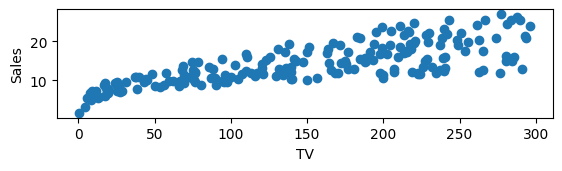

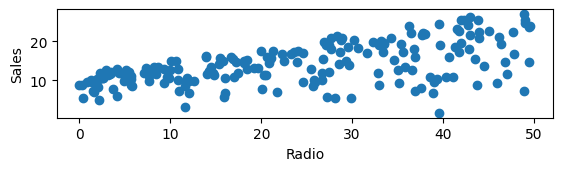

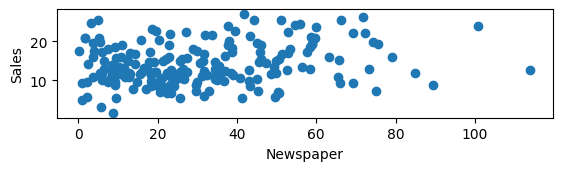

In [24]:
plt.subplot(3, 1, 1)
plt.scatter(TV, Sales)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

plt.subplot(3, 1, 2)
plt.scatter(Radio, Sales)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

plt.subplot(3, 1, 3)
plt.scatter(Newspaper, Sales)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

TRAINING MODEL TV - SALES

In [53]:
from sklearn.model_selection import train_test_split

tv_x_train, tv_x_test, tv_y_train, tv_y_test = train_test_split(TV, Sales, test_size = 0.2)
tv_model = LinearRegression()
tv_model.fit(tv_x_train, tv_y_train)

tv_y_predict = tv_model.predict(tv_x_test)

print(pd.DataFrame({"Predicción":tv_y_predict.reshape(-1), "Reales":tv_y_test.reshape(-1)}))

    Predicción  Reales
0    17.943257    13.4
1    20.250219    24.4
2     7.695292     5.3
3    15.154313    14.4
4    18.191267    18.9
5     9.871230     9.7
6    10.577825    14.7
7    11.888067    14.0
8    13.535228    19.2
9     8.256824     8.5
10   17.161791    17.1
11    8.369131     6.9
12    9.997575     9.7
13   17.400443    20.1
14   13.455678    13.2
15   14.962456    11.7
16   18.822991    22.2
17   17.302174    18.0
18    7.999455     7.6
19   18.706005    20.2
20   20.821110    20.7
21   10.657375    11.8
22   13.769200    15.0
23    9.164635    10.4
24   12.964337    15.9
25   17.129035    17.4
26   15.304055    14.1
27   12.566585    11.9
28   15.898344    14.9
29   18.392483    21.8
30   15.275979    14.9
31   15.364888    12.8
32   17.269418    19.4
33   14.887585    19.6
34   12.744404    11.6
35    8.420605     7.3
36   12.706968    13.2
37   20.194066    14.8
38    8.252145     7.2
39    7.484718     4.8


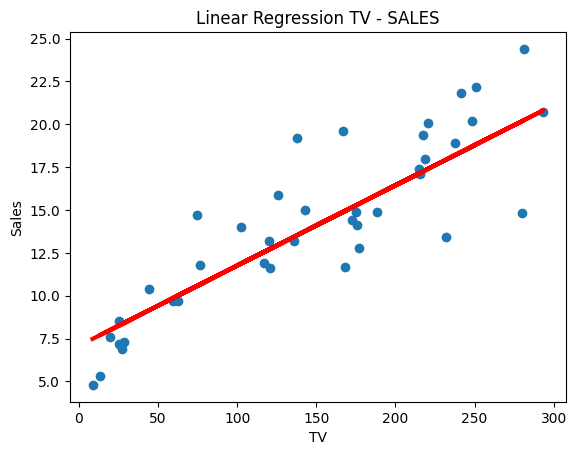

In [55]:
plt.scatter(tv_x_test, tv_y_test)
plt.plot(tv_x_test, tv_y_predict, color ='red', linewidth = 3)
plt.title("Linear Regression TV - SALES")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [66]:
m = tv_model.coef_
b = tv_model.intercept_
print("REGRESSION FUNCTION")
print("f(x) = " + str(m[0,0]) + "x + " + str(b[0]))

REGRESSION FUNCTION
f(x) = 0.04679436063023708x + 7.082286017034198


METRICS

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

mse = mean_squared_error(tv_y_test, tv_y_predict)
mae = mean_absolute_error(tv_y_test, tv_y_predict)
rmse = mean_squared_error(tv_y_test, tv_y_predict, squared = False)
rmlse = mean_squared_log_error(tv_y_test, tv_y_predict, squared = False)
r2 = r2_score(tv_y_test, tv_y_predict)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Root Mean Logarithmic Square Error (RMLSE):", rmlse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 5.851786348936413
Mean Absolute Error (MAE): 1.8441248706473619
Root Mean Square Error (RMSE): 2.4190465784966633
Root Mean Logarithmic Square Error (RMLSE): 0.1625697383838322
R^2 Score: 0.755553694847693
